In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 25})

### Load the experiment results

In [2]:
results = pd.read_parquet('../data/online_fa_results.parquet')
print(results.shape)
results.head()

(400, 15)


,observation_dim,latent_dim,spectrum_min,spectrum_max,n_samples,covar_norm,covar_distance_sklearn,covar_distance_online_gradient,covar_distance_online_em,ll_true,ll_sklearn,ll_online_gradient,ll_online_em,experiment,trial
0,1000,10,0,1,100,18.377600,22.094699,42.723793,1643.492432,-921.843140,-855.651227,-1208.510498,-883.359375,1,1
1,1000,10,0,1,100,18.624283,22.691860,41.047508,1588.679932,-932.766235,-867.227794,-1200.597290,-899.303223,1,2
2,1000,10,0,1,100,18.301115,21.502032,42.080467,2534.123047,-894.772400,-829.200310,-1197.998657,-860.598328,1,3
3,1000,10,0,1,100,18.891506,22.819915,42.432453,2205.108154,-963.468140,-895.706882,-1221.367554,-928.554565,1,4
4,1000,10,0,1,100,18.710411,22.440538,41.323112,2707.416016,-945.087036,-880.626938,-1216.456665,-913.973572,1,5


### Plot results

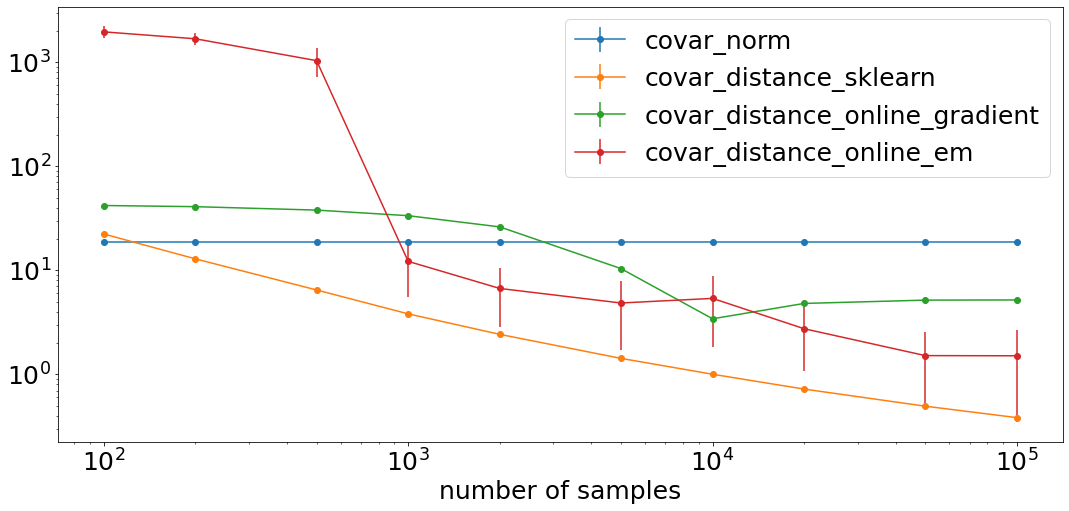

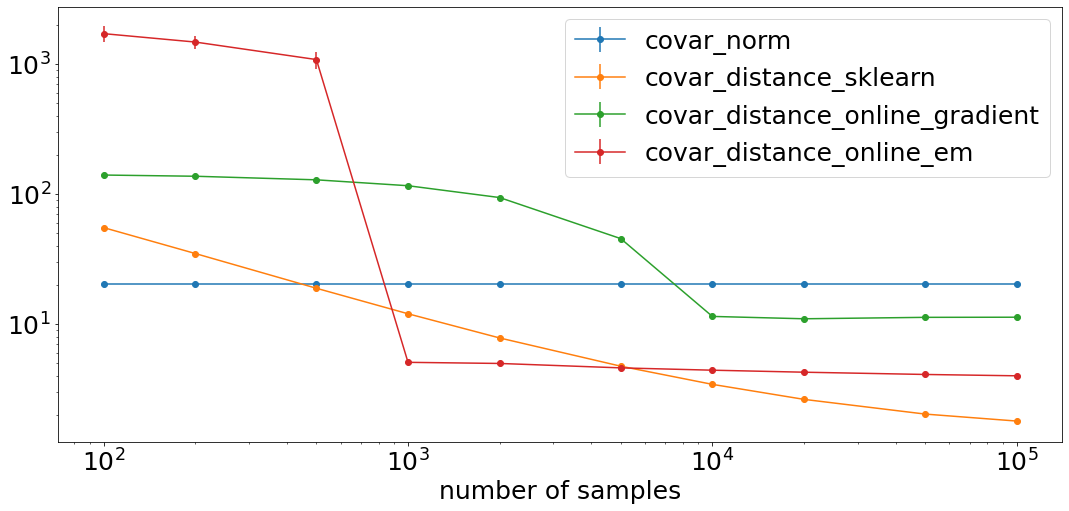

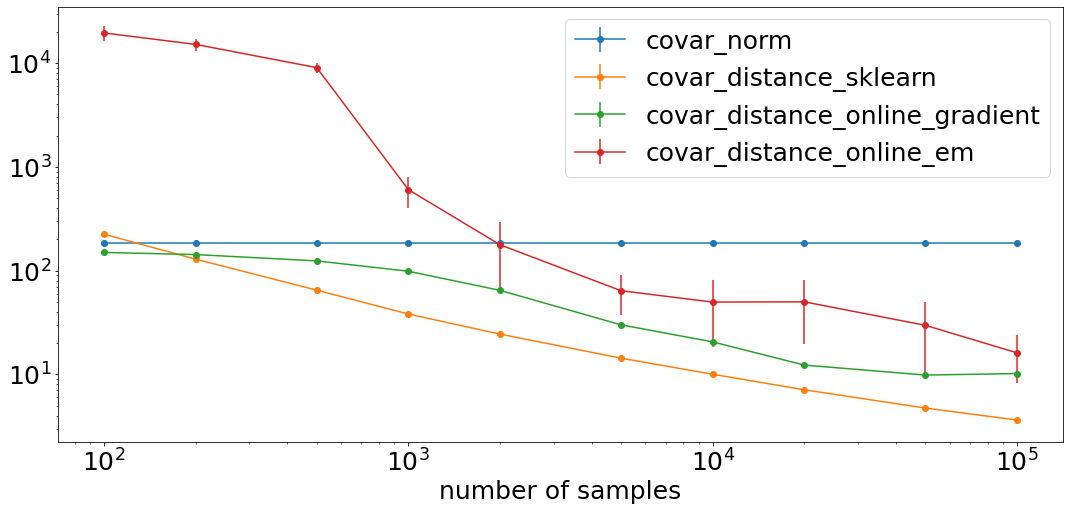

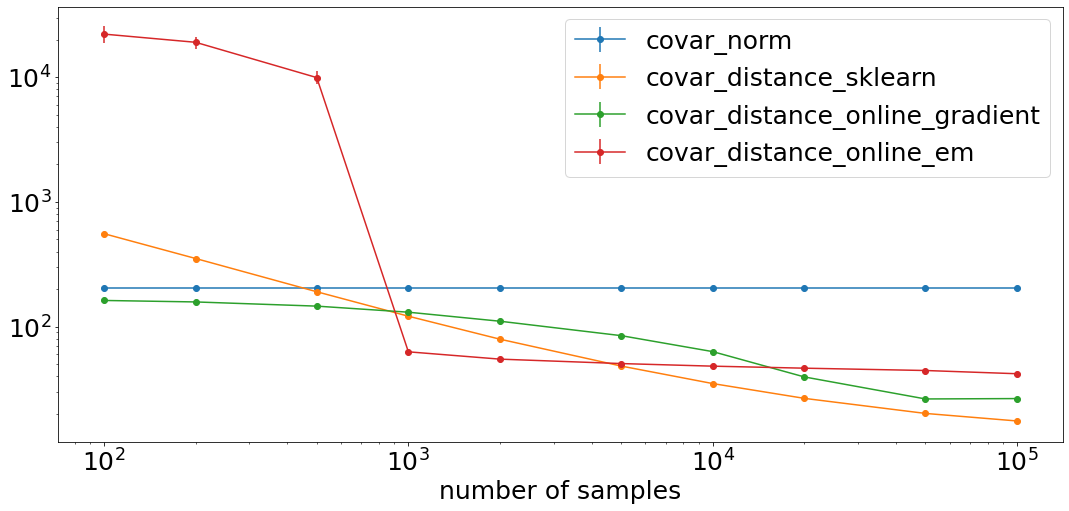

In [16]:
param_columns = ['observation_dim', 'latent_dim', 'spectrum_min', 'spectrum_max']
metric_columns = ['covar_norm', 'covar_distance_sklearn', 'covar_distance_online_gradient', 
                  'covar_distance_online_em']
group_by_column = 'n_samples'

param_combinations = results[param_columns].drop_duplicates()
for _, params in param_combinations.iterrows():
    mask = np.all(np.hstack([results[name].values.reshape(-1, 1) == value for name, value in params.items()]), axis=1)
    filtered_results = results[mask]
    grouped_results = filtered_results.groupby(group_by_column)
    group_means = grouped_results[metric_columns].mean()
    group_se = grouped_results[metric_columns].sem()
    
    plt.figure(figsize=(18, 8))
    for column in metric_columns:
        x = group_means.index
        y = group_means[column]
        se = group_se[column]
        plt.errorbar(x, y, se, label=column, marker='o')
        
    plt.xlabel('number of samples')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
        

In [84]:
group_means

,covar_norm,covar_distance_sklearn,covar_distance_online_gradient,covar_distance_online_em
n_samples,,,,
100,205.522539,556.025514,162.165262,22099.631543
200,205.522539,351.704638,157.787718,18998.035059
500,205.522539,190.411484,146.057388,9905.589697
1000,205.522539,121.266101,130.595177,62.859302
2000,205.522539,79.335225,110.536949,54.919238
5000,205.522539,48.348329,84.736149,50.610600
10000,205.522539,34.989834,63.091201,48.244833
20000,205.522539,26.631161,39.549018,46.478448
50000,205.522539,20.167508,26.344634,44.529899
